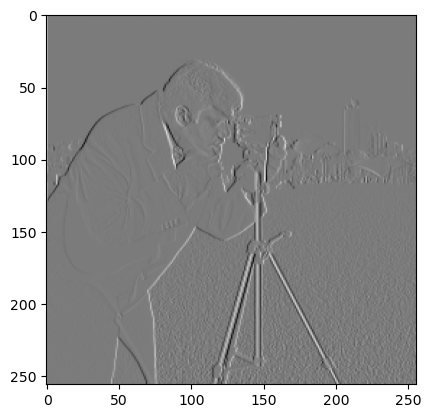

In [3]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

def my_filter(image, kernel, stride=(1,1), padding=(0,0)):
    # Compute the shape of the output
    nx = ((image.shape[0] + 2*padding[0] - kernel.shape[0]) // stride[0]) + 1
    ny = ((image.shape[1] + 2*padding[1] - kernel.shape[1]) // stride[1]) + 1

    
    # Pad the input image and initialize output array
    padded_image = np.pad(image, padding, mode='constant', constant_values=(0))
    output = np.zeros([nx,ny])

    # Perform the convolution operation by sliding the kernel across the image
    for i in range(nx):
         for j in range(ny):
                start_index_i = i*stride[0]
                start_index_j = j*stride[0]
                end_index_i = start_index_i + kernel.shape[0]
                end_index_j = start_index_j + kernel.shape[1]
                
                window = padded_image[start_index_i:end_index_i, start_index_j:end_index_j]
                output[i,j] = np.sum(window*kernel)

    return output

image = data.camera()
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filtered_img = my_filter(image, kernel, stride=(2,2), padding=(1,1))

plt.imshow(image)
plt.imshow(filtered_img, cmap='gray')